In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pickle
import pandas as pd
import numpy as np
import xarray as xr
import xesmf as xe
import os
import sys
from pathlib import Path
from tqdm import tqdm

from scipy.stats import boxcox

HOME = Path(os.getcwd()).parents[0]

sys.path.insert(1, str(HOME))

ERA_DATA_PATH = str(HOME / 'system_tests/data/ERA5')



(array([3.929e+03, 4.790e+02, 3.300e+02, 2.490e+02, 2.100e+02, 2.010e+02,
        1.590e+02, 1.400e+02, 1.210e+02, 1.260e+02, 1.180e+02, 9.800e+01,
        9.200e+01, 9.100e+01, 1.060e+02, 1.060e+02, 7.400e+01, 7.900e+01,
        9.800e+01, 8.700e+01, 6.900e+01, 6.700e+01, 5.800e+01, 5.500e+01,
        5.600e+01, 6.100e+01, 4.400e+01, 5.100e+01, 6.300e+01, 4.200e+01,
        4.500e+01, 5.000e+01, 4.900e+01, 3.200e+01, 5.100e+01, 2.800e+01,
        3.500e+01, 4.200e+01, 4.700e+01, 4.100e+01, 4.200e+01, 2.700e+01,
        4.200e+01, 3.300e+01, 3.200e+01, 3.100e+01, 4.000e+01, 1.800e+01,
        2.700e+01, 2.000e+01, 2.700e+01, 2.600e+01, 3.100e+01, 1.800e+01,
        2.500e+01, 2.300e+01, 3.000e+01, 1.800e+01, 1.600e+01, 2.200e+01,
        1.100e+01, 1.900e+01, 1.700e+01, 1.800e+01, 1.800e+01, 1.200e+01,
        1.500e+01, 1.000e+01, 2.200e+01, 1.400e+01, 6.000e+00, 1.300e+01,
        8.000e+00, 6.000e+00, 8.000e+00, 1.300e+01, 8.000e+00, 1.000e+01,
        1.000e+01, 1.000e+01, 1.200e+0

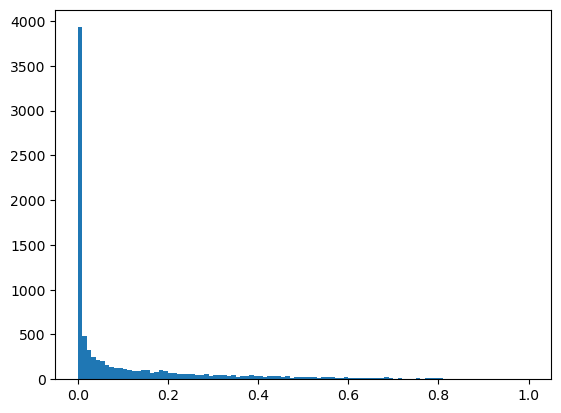

In [4]:
import random
import seaborn as sns
import matplotlib.pyplot as plt

window_size = 20
threshold=0.1
with open(f'../fss_stats/fractions_{window_size}_{threshold}.pkl', 'rb') as ifh:
    fss_stats = pickle.load(ifh)

(n_samples, lat_length, lon_length) = fss_stats.shape

lat_index = random.choice(range(lat_length))
lon_index = random.choice(range(lon_length))

data = fss_stats[:, lat_index, lon_index]
plt.hist(data, bins=100)

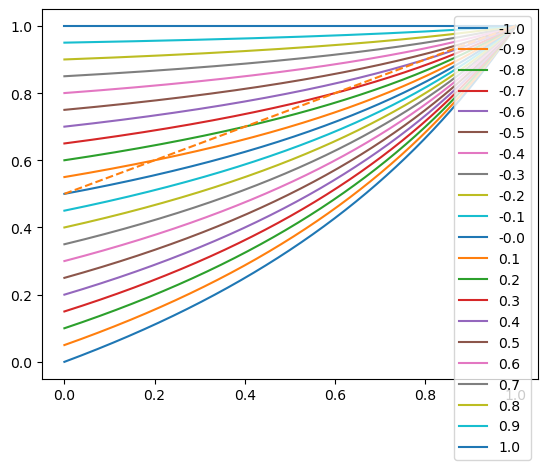

In [6]:
p = np.arange(0,1,0.001)

rho_vals = np.arange(-1, 1.1, 0.1)
c_vals = np.arange(1,50)

def fss(p, rho):
    fss_original = 0.5 + (p/2)*(1/(2-p))
    fss = fss_original + rho*(1-p)/(2-p)
    return fss, fss_original



fss_dict = {n: [fss(item, rho_vals[n])[0] for item in p] for n in range(len(rho_vals))}
fss_dict_with_c = {n: [fss(item, c_vals[n])[0] for item in p] for n in range(len(c_vals))}

for n, fss_vals in fss_dict.items():
    plt.plot(p, fss_vals, label=f'{rho_vals[n]:.1f}')
plt.plot(p, [0.5 + item/2 for item in p], '--') 
plt.legend()

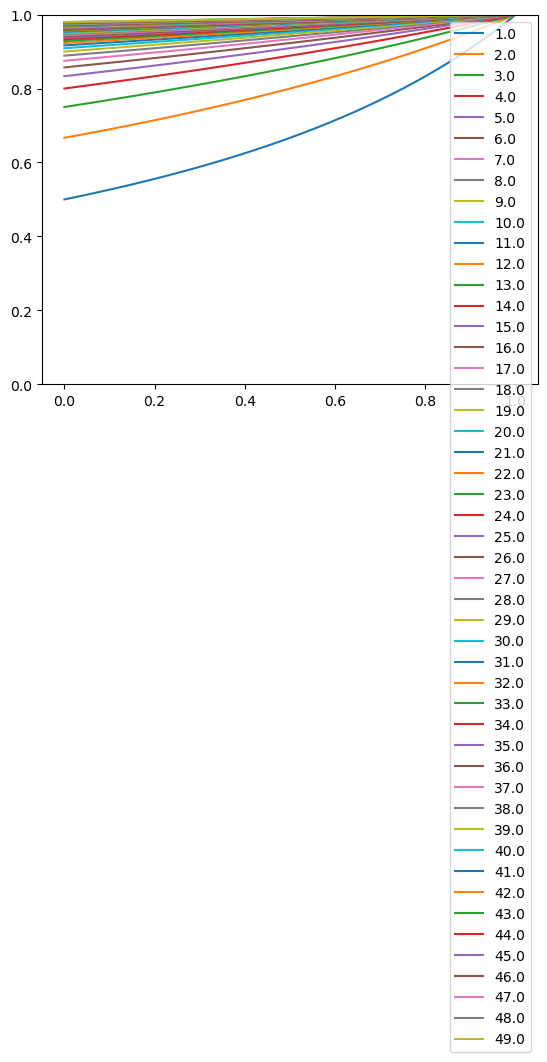

In [7]:
def fss_with_c(p, c):
    fss = 0.5 +(c - 1 + p)/(2 * (c+1-p))
    return fss
fss_dict_with_c = {n: [fss_with_c(item, c_vals[n]) for item in p] for n in range(len(c_vals))}
for n, fss_vals in fss_dict_with_c.items():
    plt.plot(p, fss_vals, label=f'{c_vals[n]:.1f}')
    plt.ylim([0, 1])
plt.legend()

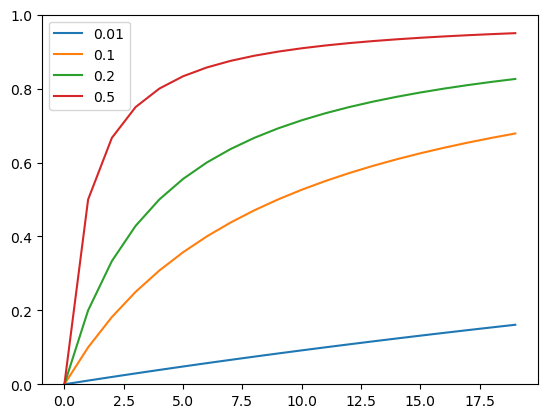

In [21]:
# The expected value at a particular window size, with zere correlation
p = 0.01

nrange = np.arange(0, 20)

for p in [0.01, 0.1, 0.2, 0.5]:
    fss_threshold = [(n*p) / (n*p -p + 1) for n in nrange]

    plt.plot(nrange, fss_threshold, label=p)
    plt.ylim([0,1])
plt.legend()

In [22]:
import numpy as np

truth_array = np.load('truth_array.npy')
fcst_array = np.load('fcst_array.npy')


In [ ]:

threshold = 0.1
(n_samples, height, width) = truth_array.shape

fractions_truth = []
fractions_fcst = []
for n in n_samples:
    
    truth_data = truth_array[n, :, :]
    fcst_data = fcst_array[n, :, :]
    
    for h_window in range(height):
        for w_window in range(width):
            
            truth_window = truth_data[h_window*window_size:(h_window+1)*window_size, w_window*window_size:(w_window+1)*window_size]
            truth_fraction = (truth_window > threshold).sum() / (window_size**2)
            
            truth_window = truth_data[h_window*window_size:(h_window+1)*window_size, w_window*window_size:(w_window+1)*window_size]
            truth_fraction = (truth_window > threshold).sum() / (window_size**2)
